In [85]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px


<h1>Load The Dataset</h1>

In [86]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [89]:
# Drop the 'Id' column 
df = df.drop(columns=["Id"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [91]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


<h2>Data Aggregation </h2>

In [ ]:
# Basic statistics of the data
df.describe()

In [8]:
# Datatype of each column in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# show number of samples for each Species
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<h2>Visualize the Data</h2>


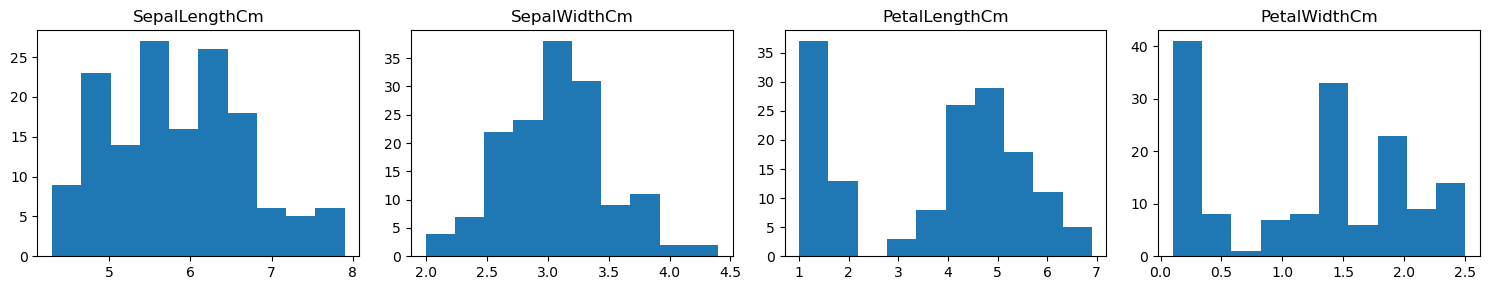

In [13]:
# List of columns to create histograms for
columns_to_plot = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Create subplots for each column
fig, axs = plt.subplots(1, len(columns_to_plot), figsize=(15, 3))  # Adjust figsize as needed

# Plot histograms for each column
for i, column in enumerate(columns_to_plot):
    axs[i].hist(df[column])
    axs[i].set_title(column)

plt.tight_layout()
plt.show()


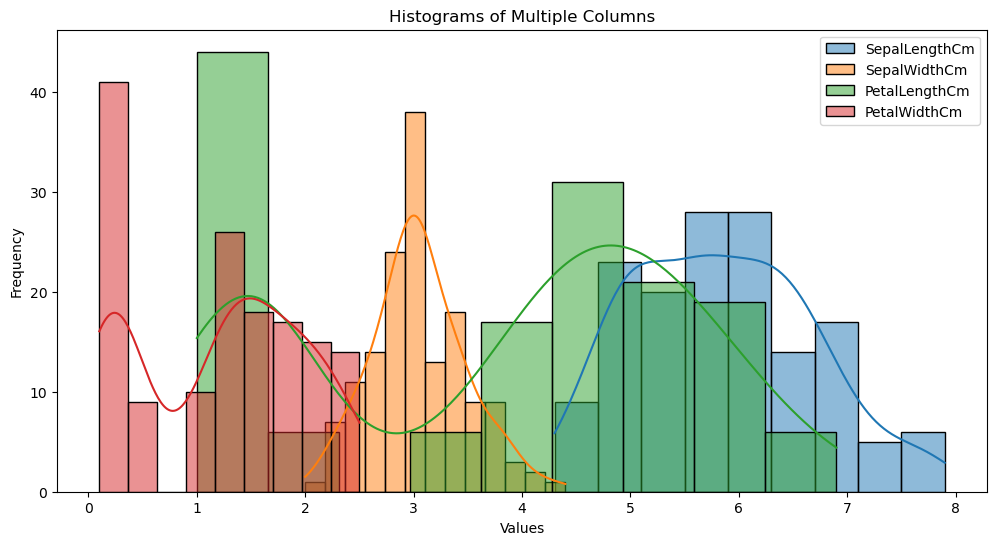

In [15]:
# Create histograms using histplot
plt.figure(figsize=(12, 6))
for column in columns_to_plot:
    sns.histplot(df[column], kde=True, label=column, alpha=0.5)
    
plt.legend()
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histograms of Multiple Columns')
plt.show()

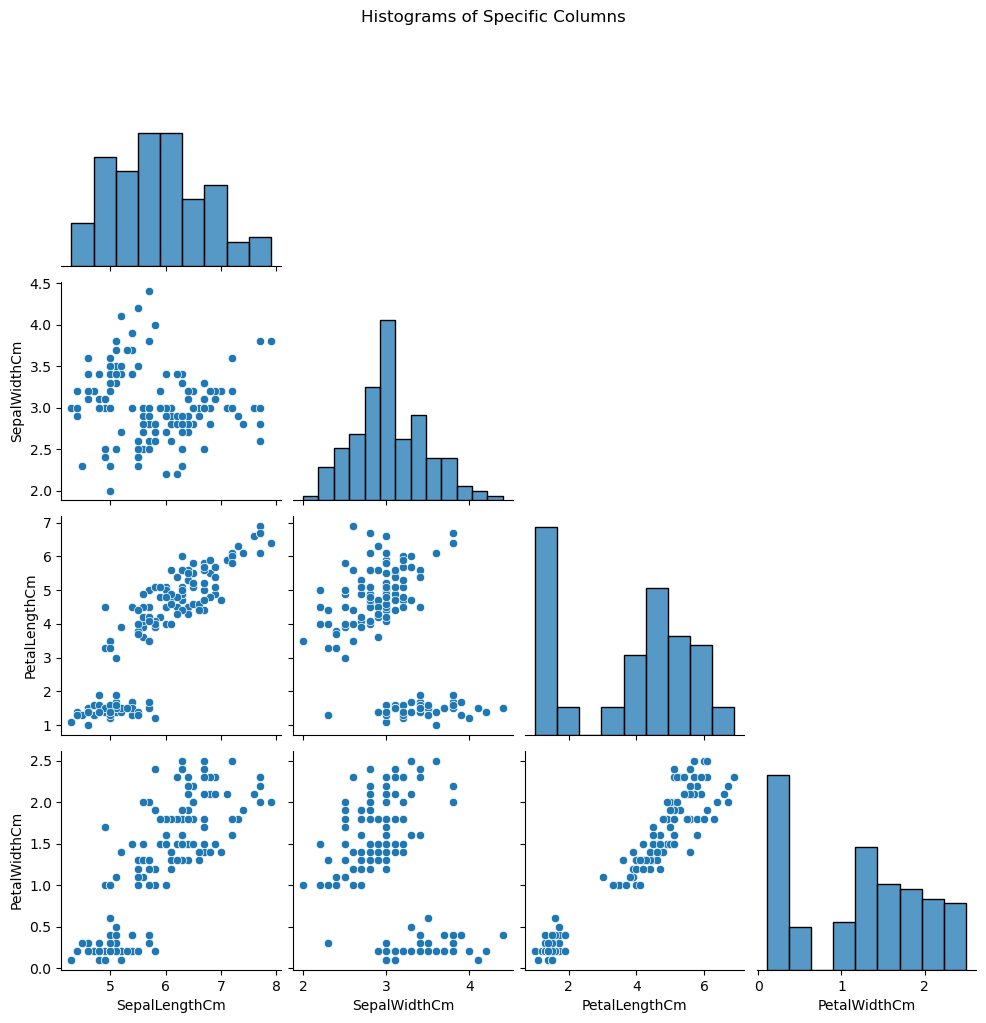

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the specified columns
columns_to_plot = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Plot histograms for specific columns using pairplot
sns.pairplot(df[columns_to_plot], diag_kind='hist', corner=True)
plt.suptitle('Histograms of Specific Columns', y=1.02)
plt.show()


In [16]:
# visualize relationships between features using Plot scatterplots  
colors = ['red', 'orange', 'blue']
species = [0, 1, 2]

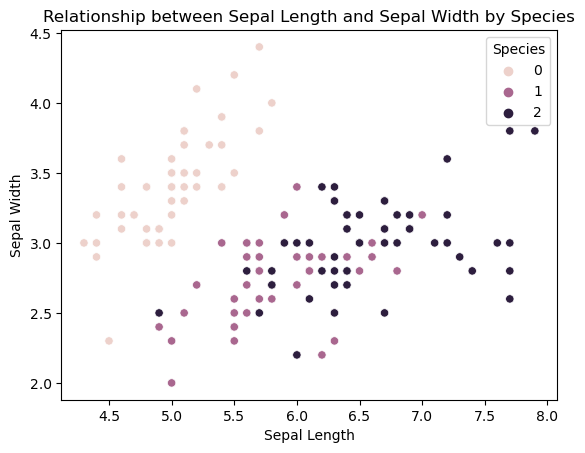

In [17]:
import seaborn as sns

# Create scatterplot using Seaborn
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Relationship between Sepal Length and Sepal Width by Species")
plt.legend(title='Species')
plt.show()


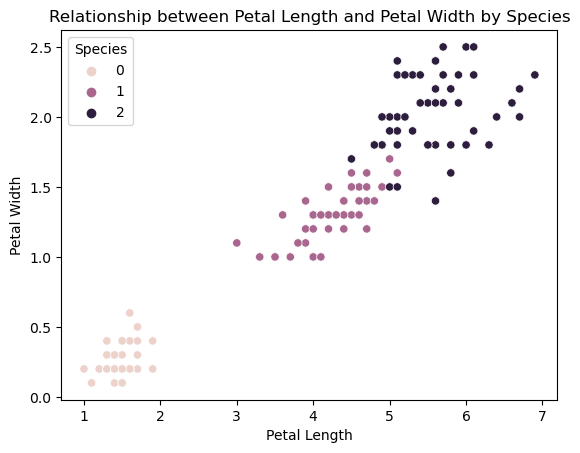

In [18]:
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Relationship between Petal Length and Petal Width by Species")
plt.legend(title='Species')
plt.show()


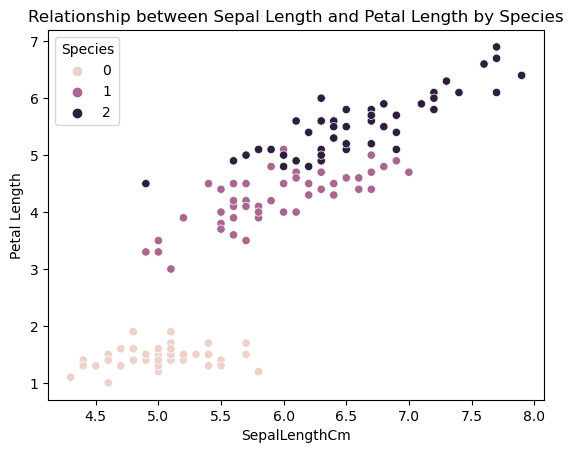

In [19]:
sns.scatterplot(data=df, x='SepalLengthCm', y='PetalLengthCm', hue='Species')
plt.xlabel("SepalLengthCm")
plt.ylabel("Petal Length")
plt.title("Relationship between Sepal Length and Petal Length by Species")
plt.legend(title='Species')
plt.show()

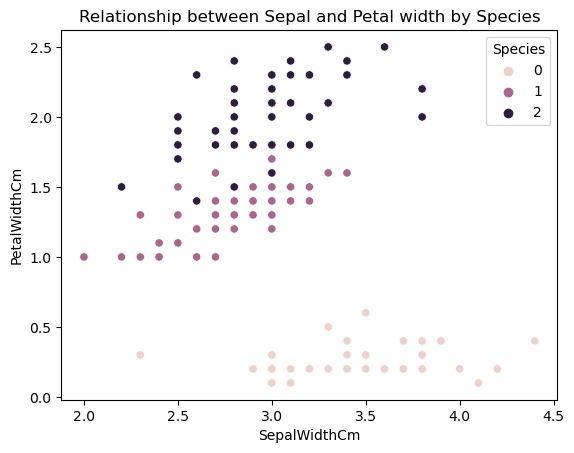

In [20]:
sns.scatterplot(data=df, x= 'SepalWidthCm', y = 'PetalWidthCm', hue='Species')
plt.xlabel("SepalWidthCm")
plt.ylabel("PetalWidthCm")
plt.title("Relationship between Sepal and Petal width by Species")
plt.legend(title='Species')
plt.show()


<h3>From the above visualizations(Relationship and Historical data), the Iris-setosa is clearly distinguished from Iris-versicolor and Iris-virginica </h3>

<h2>Split the dataset into training and testing sets</h2>

In [61]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.40)

In [63]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train, y_train)
print("Accuracy (Logistic Regression): ", model1.score(x_test, y_test) * 100)

Accuracy (Logistic Regression):  88.33333333333333


In [67]:
# K-nearest Neighbours Model (KNN)
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()
model2.fit(x_train, y_train)
print("Accuracy (KNN): ", model2.score(x_test, y_test) * 100)

Accuracy (KNN):  96.66666666666667


In [69]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(x_train, y_train)
print("Accuracy (Decision Tree): ", model3.score(x_test, y_test) * 100)

Accuracy (Decision Tree):  95.0


<h2>Thank you<?h2>